In [19]:
from main import load_or_create_the_index ,ORIGIN_DATA ,InvertedIndex,Statistic
from query import Query

In [2]:
load_or_create_the_index()

loading index from file


In [11]:
def print_origin_new(res):
     for i,j in enumerate(res):
            
            print(ORIGIN_DATA[j]['title'] +" -- "+str(i+1))
            print("doc_id =",j,"                        ")
            print()
            print()
        

# سوال۱ 
ابتدا متن را گرفته و لینک هارو از ان حذف میکنیم با ریجکس

سپس حروف های اضافه مانند ()!*# و.. را حذف میکنیم
حالا متن ما نرمال شده
سپس توکنایز میکنیم 
و بعد توکن های پرتکرار یا همان stopwords هارو حذف میکنیم و در نهایت  ریشه یابی رو روی توکن ها انجام میدهیم

# سوال2 
اگر  کلمات پر تکرار را حذف نکنیم

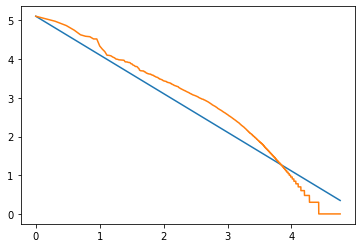

In [10]:
import matplotlib.pyplot as plt
import math
With_stops_INDEX = './data/with_stops_index'

InvertedIndex.load(Without_stops_INDEX)

x= InvertedIndex.get_counts()
len_key = len(list(x.keys()))
values = list(x.values())
values.sort(key=lambda t:t,reverse=True)


max_number = values[0]

l = []
l2 = []
l3 = []
for i in values:
    l3.append(math.log(i, 10))

for i in range(len_key):
    l.append(math.log(i+1, 10))
    l2.append(math.log(max_number/(i+1), 10))

plt.plot(l, l2)
plt.plot(l, l3)
plt.show()



و اگر  کلمات پر تکرار را حذف کنیم

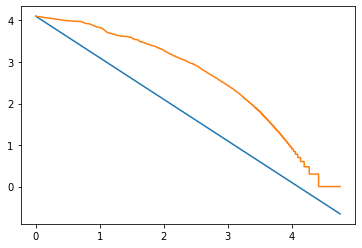

In [11]:
import matplotlib.pyplot as plt
import math
NORMAL_INDEX = './data/index'

InvertedIndex.load(NORMAL_INDEX)

x= InvertedIndex.get_counts()
len_key = len(list(x.keys()))
values = list(x.values())
values.sort(key=lambda t:t,reverse=True)


max_number = values[0]

l = []
l2 = []
l3 = []
for i in values:
    l3.append(math.log(i, 10))

for i in range(len_key):
    l.append(math.log(i+1, 10))
    l2.append(math.log(max_number/(i+1), 10))

plt.plot(l, l2)
plt.plot(l, l3)
plt.show()



اگر در نمودار اول دقت کنیم دو خط در نمودار به هم نزدیک تر هستند پس خط آبی یا همون تخمین ما دقیق تر بوده است و تخمین بهتری است

ما کلمات پرتکرار را در اون حالت حذف نکرده ایم پس تخمینمون طبق قانون zipf خواهد بود

# سوال۳



{500: Statistic.Item(tokens=75415, vocab_size=8151), 1000: Statistic.Item(tokens=148902, vocab_size=11763), 1500: Statistic.Item(tokens=223492, vocab_size=14409), 2000: Statistic.Item(tokens=333954, vocab_size=20116), 2500: Statistic.Item(tokens=473149, vocab_size=25081), 3000: Statistic.Item(tokens=618466, vocab_size=29584), 3500: Statistic.Item(tokens=748551, vocab_size=32779), 4000: Statistic.Item(tokens=812827, vocab_size=35179), 4500: Statistic.Item(tokens=880729, vocab_size=37045), 5000: Statistic.Item(tokens=979572, vocab_size=39608), 5500: Statistic.Item(tokens=1082353, vocab_size=42065), 6000: Statistic.Item(tokens=1179738, vocab_size=44028), 6500: Statistic.Item(tokens=1259419, vocab_size=48075), 7000: Statistic.Item(tokens=1352744, vocab_size=52488), 7500: Statistic.Item(tokens=1451101, vocab_size=57120)}


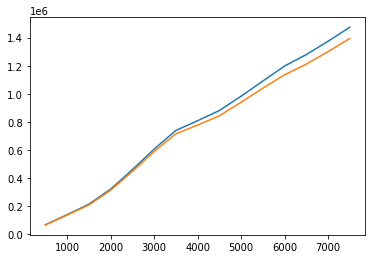

In [25]:
import matplotlib.pyplot as plt

statistic_without_stem= './data/statistic_without_stem'
normal ='./data/statistic'

Statistic.load(statistic_without_stem)
print()
# plt.plot(Statistic.items.keys(), [i.vocab_size for i in Statistic.items.values()])
# plt.plot(Statistic.items.keys(), [i.tokens for i in Statistic.items.values()])
plt.plot(Statistic.items.keys(), [i.tokens-i.vocab_size for i in Statistic.items.values()])

Statistic.load(normal)
print(Statistic.items)

plt.plot(Statistic.items.keys(), [i.tokens-i.vocab_size for i in Statistic.items.values()])


# plt.plot(l, l3)

# سوال 4

۱ در بعضی از حالات نمیخواهیم ریشه یابی انجام شود برای مثال کلمه "مردم" و فعل "مردم" که به "مرد" ریشه یابی میشوند

۲ بعضی از   ضعف های کتابخانه هضم که برای مثال کلمه "پیام" رو به "پیا" ریشه یابی میکرد

۳ ریشه برخی کلمات دوحرفی  هستند و با کلمات پر تکرار اشتباه میشوند مانند دریدن که ریشه آن در است

# توضیحاتی در مورد کلاس  Query

این کلاس دارای سه متد است که :

best_Search برای ما بهترین و دقیق‌ترین سرچ را انجام میدهد و داک هایی را برمیگرداند که دقیقا به همان ترتیب سرچ و پشت‌سر هم در متن امده است و این جواب‌ها دقیقا با خواسته کاربر مطابقت دارند

sub_search تمام زیر حالت های ممکن از کلمات را ساخته و سرچ میکند ( اول زیر ترکیب های بزرگتر سپس کوچکتر را برمیگرداند)

full_search ابتدا best_search را صدا میزند و جواب هارو در لیست ریخته سپس sub_search  را صدا میزند و جوابها را به ته آن لیست اضافه میکند و در آخر با حفظ اولویت تکراری هارا حذف میکند

# سوال ۵

###   الف) بین‌الملل

In [ ]:
res =Query('بین‌الملل').best_search()
print_origin_new(res)

###   ب) دانشگاه امیرکبیر

In [ ]:
res =Query('دانشگاه امیرکبیر').best_search()
print_origin_new(res)

In [ ]:
res =Query('دانشگاه امیرکبیر').full_search()
print_origin_new(res)

### پ)
### دانشگاه صنعتی امیرکبیر، سازمان ملل متحد، جمهوری اسلامی ایران

In [ ]:
res =Query('دانشگاه صنعتی امیرکبیر').best_search()
print_origin_new(res)

In [ ]:
res =Query('دانشگاه صنعتی امیرکبیر').full_search()
print_origin_new(res)

In [ ]:
res =Query('سازمان ملل متحد').best_search()
print_origin_new(res)

In [ ]:
res =Query('جمهوری اسلامی ایران').best_search()
print_origin_new(res)

###   ت) ژیمناستیک 

In [ ]:
res =Query('ژیمناستیک').best_search()
print_origin_new(res)

###   ث) واکسن آسترازنکا 

In [ ]:
res =Query('واکسن آسترازنکا').best_search()
print_origin_new(res)


In [ ]:
res =Query('واکسن آسترازنکا').full_search()
print_origin_new(res)
